### Simulation

In [1]:
from bmc.simulate import simulate
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
low = -20e-6
high = 20e-6

n_iso = 10000

z_pos = np.linspace(low, high, n_iso)
z_pos = torch.tensor(z_pos)
z_pos = torch.cat((z_pos, torch.tensor([0.0])))  # Füge 0 hinzu
z_pos = torch.sort(z_pos).values

In [3]:
seq_path_gauss = 'seq_lib/10_ETM.seq'
config_path = 'sim_lib/config_1pool.yaml'

adc_time = 20e-3
retun_zmag = False
show_plot = False
n_backlog = 3
webhook = False
plt_range = [0, 4]
iso_select = [-5,0,5]

In [4]:
sim = simulate(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   return_zmag=retun_zmag,
                   iso_select=iso_select,
                   show_plot=show_plot,
                   n_backlog=n_backlog,
                   webhook=webhook,
                   plt_range=plt_range)  # simulation mac

BMCTool simulation:   0%|          | 0/7 [00:00<?, ?it/s]

BMCTool simulation: 100%|██████████| 7/7 [02:07<00:00, 18.20s/it]

['gz at 0.0000s', 'rf at 0.0800s', 'gz at 0.0820s', 'adc at 0.0825s']


/home/danielmiksch/optim/bmc/utils/eval.py:303: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


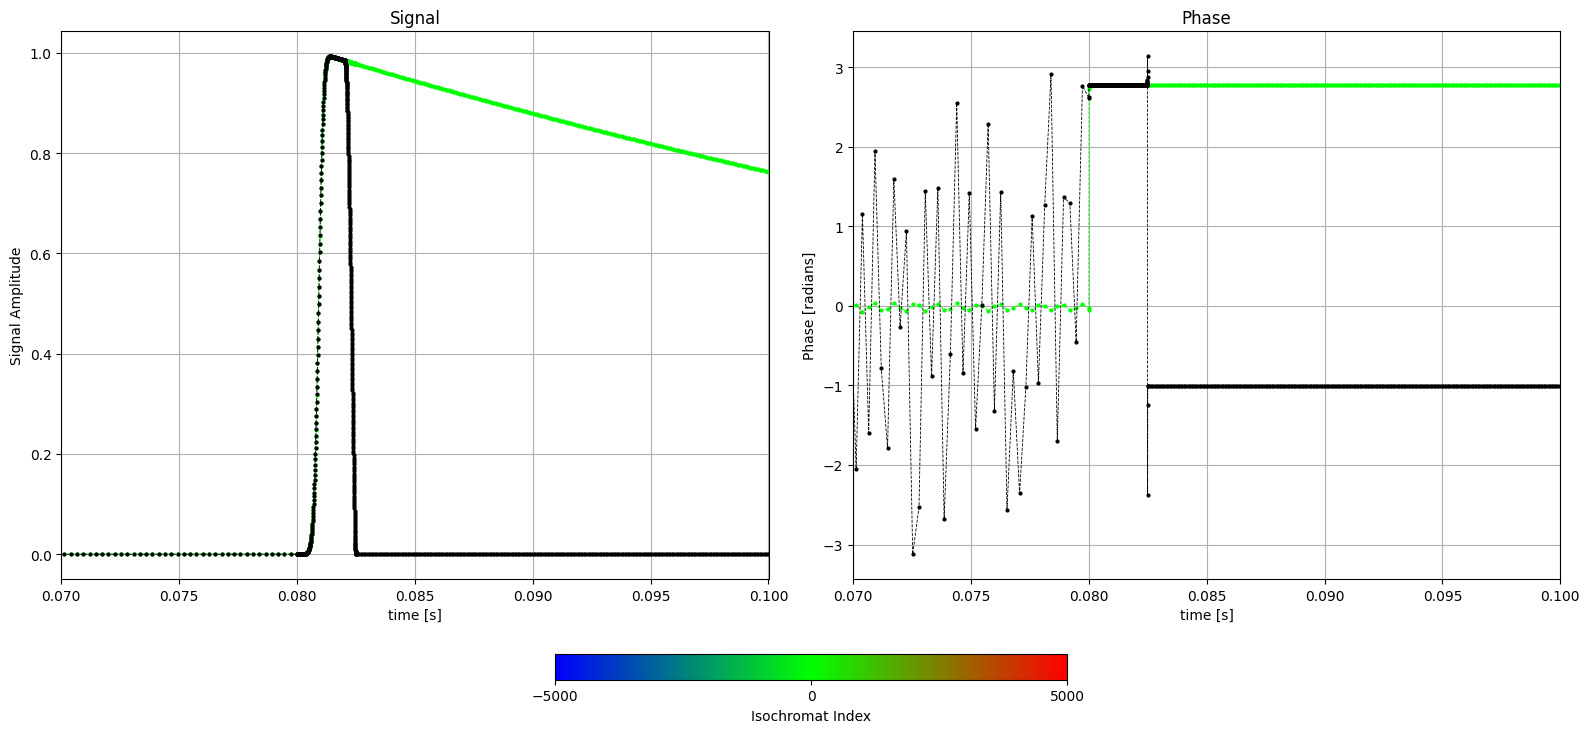

In [ ]:
from bmc.utils.eval import plot_sim
time, m_z, m_z_total, m_c, m_c_total = sim.get_mag(return_cest_pool=False)
time = time.cpu().numpy()
m_z = m_z.cpu().numpy()
m_z_total = m_z_total.cpu().numpy()
m_c = m_c.cpu().numpy()
m_c_total = m_c_total.cpu().numpy()

iso_select = [0]
plt_range = [0.0, 0.0353] #1ETM
plt_range = [0.07, 0.1]

# _ = plot_sim(m_out=[m_z, m_z_total], time=time., plt_range=plt_range, iso_select=iso_select)
_ = plot_sim(m_out=[m_c, m_c_total], time=time, plt_range=plt_range, iso_select=iso_select)

m_trans_plus = np.abs(m_c_total)[-900:]
m_z_plus = m_z_total


### Animation

In [12]:
run_time = .1
track_path = True
ie = False
timing = False
total_mag = False
animate_cest = False
kwargs = {'quality': '-ql', 'write': '--write_to_movie'}  #--write_to_movie

In [13]:
# sim.animate(run_time=run_time, 
#             track_path=track_path, 
#             ie=ie, 
#             timing=timing,
#             total_mag=total_mag,
#             animate_cest=animate_cest,
#             **kwargs)

In [14]:
seq_path_gauss = 'seq_lib/10_ETM_minus.seq'

In [15]:
sim_minus = simulate(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   return_zmag=retun_zmag,
                   iso_select=iso_select,
                   show_plot=show_plot,
                   n_backlog=n_backlog,
                   webhook=webhook,
                   plt_range=plt_range)  # simulation mac

BMCTool simulation:   0%|          | 0/7 [00:00<?, ?it/s]

BMCTool simulation: 100%|██████████| 7/7 [01:50<00:00, 15.84s/it]

['rf at 0.0000s', 'rf at 0.0800s', 'gz at 0.0820s', 'adc at 0.0825s']


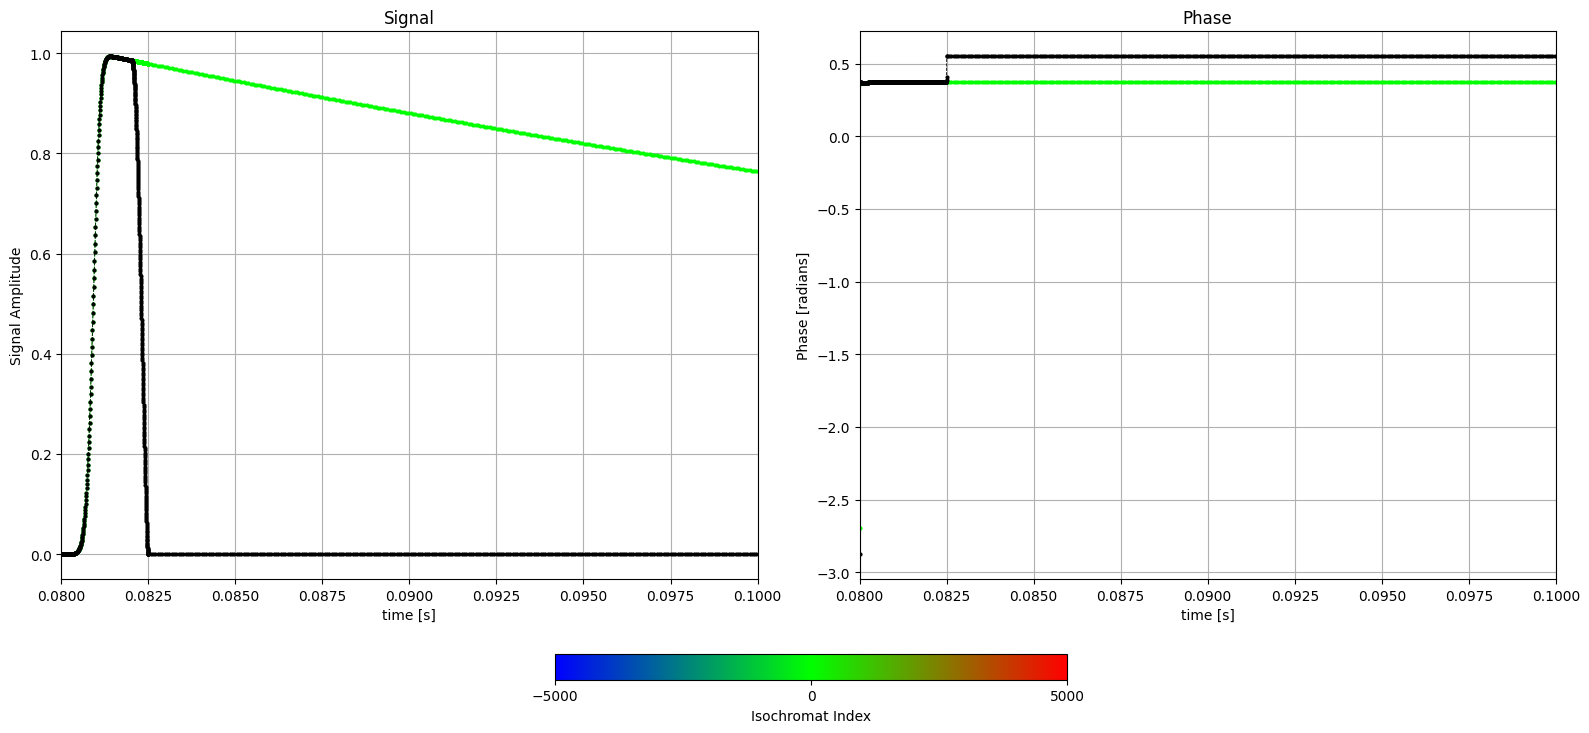

In [ ]:
from bmc.utils.eval import plot_sim
time, m_z, m_z_total, m_c, m_c_total = sim_minus.get_mag(return_cest_pool=False)
time = time.cpu().numpy()
m_z = m_z.cpu().numpy()
m_z_total = m_z_total.cpu().numpy()
m_c = m_c.cpu().numpy()
m_c_total = m_c_total.cpu().numpy()

iso_select = [0]
plt_range = [0.0, 0.0353] #1ETM
plt_range = [0.08, 0.1]

# _ = plot_sim(m_out=[m_z, m_z_total], time=time, plt_range=plt_range, iso_select=iso_select)
_ = plot_sim(m_out=[m_c, m_c_total], time=time, plt_range=plt_range, iso_select=iso_select)

m_trans_minus = np.abs(m_c_total)[-900:]

In [1]:
from bmc.utils.tex_variation import run_variation_parallel
import numpy as np
import torch

seq_on = 'seq_lib/10_ETM.seq'
seq_off = 'seq_lib/10_ETM_minus.seq'
config_path = 'sim_lib/config_1pool.yaml'

adc_time = 20e-3
webhook = False

low = -20e-6
high = 20e-6 
n_iso = 100
z_pos = np.linspace(low, high, n_iso)
z_pos = torch.tensor(z_pos)
z_pos = torch.cat((z_pos, torch.tensor([0.0])))  # Füge 0 hinzu
z_pos = torch.sort(z_pos).values

print(f'n_iso: {len(z_pos)}')
_, singal, fig = run_variation_parallel(seq_on, seq_off, config_path, adc_time, z_pos, webhook, show_plot=False, save_plot=False)


n_iso: 101


BMCTool simulation: 100%|██████████| 7/7 [00:02<00:00,  2.73it/s]


['rf at 0.0000s', 'gz at 0.0020s', 'adc at 0.0025s']
['rf at 0.0000s', 'gz at 0.0020s', 'adc at 0.0025s']


Signal: 0.00023167786845524756


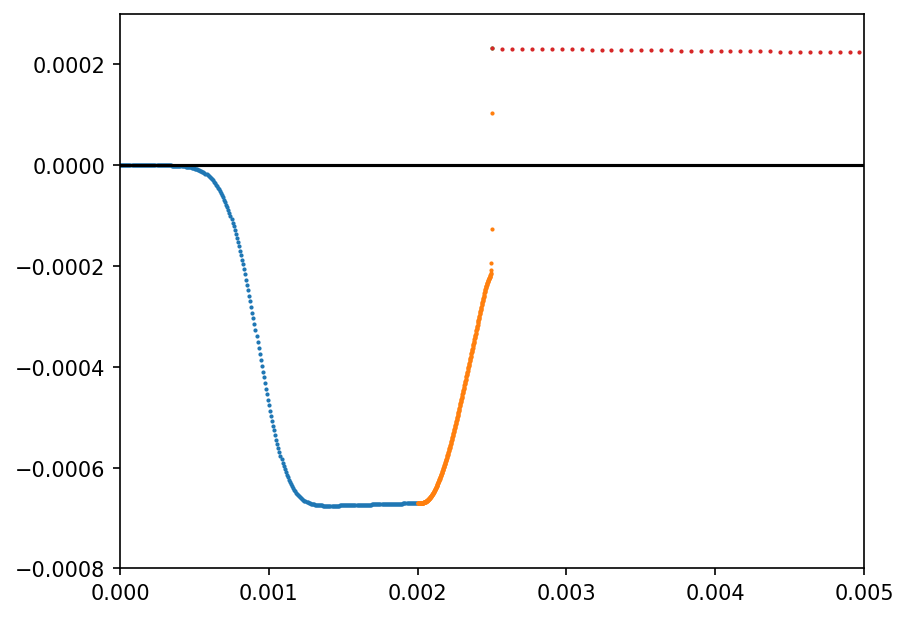

In [5]:
%matplotlib widget
print(f'Signal: {singal.item()}')
fig